1. 앙상블의 개념
    - 보팅
    - 배깅
    - 페이스팅
    - 부스팅
2. 회귀
    - Decision Tree
    - Random Forest
    - GBM
    - XGB Reg
    - LGB Reg
3. 분류
    - 나이브베이즈
    - KNN
    - Decision Tree Classifier
    - SVM
    - 스태킹앙상블
    - 앙상블(Voting)
    - Bagging(RF Classifier)
    - XGB Classifier
4. 군집
    - Hierarchical Clustering
    - K-Means Clustering
    - Mean-Shift Clustering
    - GMM
    - DBSCAN
5. 차원축소
    - 요인분석
    - PCA 주성분분석
    - LDA 선형판별분석
    - SVD
    - NMF

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  ##warning sign 출력 무시
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)  ##scientific notation 삭제
plt.rcParams['font.family'] = 'Malgun Gothic'  ##한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False    ##마이너스기호 깨짐 방지

In [27]:
## 군집, 회귀용 데이터 생성 (보스턴 집값 데이터)
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000


In [28]:
df['CHAS'] = df['CHAS'].astype(object) ##데이터 타입 변경
##결측값은 평균으로 대체
df[['CRIM','ZN','INDUS','AGE','LSTAT']] = df[['CRIM','ZN','INDUS','AGE','LSTAT']].fillna((df[['CRIM','ZN','INDUS','AGE','LSTAT']].mean())) 
df['CHAS'] = df['CHAS'].fillna(method = 'bfill') ##이전값으로 채우기

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [76]:
## 분류용 데이터 생성 (위스콘신 유방암 데이터)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
dfc = pd.DataFrame(cancer.data, columns =cancer.feature_names)
dfc['target'] = pd.Series(cancer.target)
dfc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99000,10.38000,122.80000,1001.00000,0.11840,0.27760,0.30010,0.14710,0.24190,0.07871,...,17.33000,184.60000,2019.00000,0.16220,0.66560,0.71190,0.26540,0.46010,0.11890,0
1,20.57000,17.77000,132.90000,1326.00000,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,23.41000,158.80000,1956.00000,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902,0
2,19.69000,21.25000,130.00000,1203.00000,0.10960,0.15990,0.19740,0.12790,0.20690,0.05999,...,25.53000,152.50000,1709.00000,0.14440,0.42450,0.45040,0.24300,0.36130,0.08758,0
3,11.42000,20.38000,77.58000,386.10000,0.14250,0.28390,0.24140,0.10520,0.25970,0.09744,...,26.50000,98.87000,567.70000,0.20980,0.86630,0.68690,0.25750,0.66380,0.17300,0
4,20.29000,14.34000,135.10000,1297.00000,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,...,16.67000,152.20000,1575.00000,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678,0


In [77]:
Xc = dfc.iloc[:,:-1]
yc = dfc.iloc[:,-1]

# 앙상블
- 가장 좋은 모델 하나만 사용하는게 아니라 몇가지 모델을 통한 예측기(분류 또는 회귀)를 연결하여 더 좋은 예측기를 만드는 방법  
- 일반적으로 앙상블 모형은 하나의 예측기를 훈련시킬 때보다 편향을 비슷하지만 **분산**이 감소한다

## Voting(보팅)
### 1-1) Hard Voting (직접투표)
- 어떤 훈련 데이터셋에 대해 여러 분류기(로지스틱 회귀-A, SVM-A, Randomforest-B)를 훈련시켰을 때 각 분류기의 예측을 모아 다수결 투표(A:2개, B:1개 -> A)로 정하는 것
- 각 분류기가 분류한 결과 class를 가지고 투표함

In [22]:
# 투표기반 voting classifiers VS 개별 분류기 비교
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression(solver = 'liblinear')
rnd_clf = RandomForestClassifier(n_estimators=10)
svm_clf = SVC(gamma='auto')

voting_clf = VotingClassifier(estimators=[('lr',log_clf),
                                         ('rf',rnd_clf),
                                         ('svc',svm_clf)],
                             voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('rf', RandomForestClassifier(n_estimators=10)),
                             ('svc', SVC(gamma='auto'))])

In [23]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.888
VotingClassifier 0.904


### 1-2) 간접투표 (soft voting) 
- 각 분류기마다 해당 범주에 속할 확률(0~1값)을 평균을 내어 평균이 가장 높은 범주로 분류
    (로지스틱 회귀 - A:0.7, B:0.3, SVM - A:0.1, B:0.9, Randomforest - A:0.6, B:0.4)  
    평균이 가장 높은 범주로 분류(A: $\frac{0.7+0.1+0.6}{3} = 0.47$ , B: $\frac{0.3+0.9+0.4}{3} = 0.53 $ -> B (hard로하면 A) )   

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver = 'liblinear')
rnd_clf = RandomForestClassifier(n_estimators=10)
svm_clf = SVC(gamma='auto', probability=True) # SVM에서 기본값으로 범주에 속할 확률을 제공하지 않으므로 prob옵션 True로 줘야 간접투표 가능

voting_clf = VotingClassifier(estimators=[('lr',log_clf),
                                         ('rf',rnd_clf),
                                         ('svc',svm_clf)],
                             voting='soft') # voting 옵션에 soft 명시
voting_clf.fit(X_train, y_train)


for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.864
SVC 0.888
VotingClassifier 0.912


## Bagging (Bootstrap Aggregating)
- 같은 모델에서 bootstrap(복원 추출)을 통해 여러개의 분류기를 만들고 결과를 voting하는 방식으로 집계(Aggregating)  
- 중복을 허용하여 샘플링하는 방식으로 각 트리가 사용하는 데이터를 일부 (약 2/3)로 제한(나머지 OOB)  
    OOB(Out of bag)이란 training set에서 샘플링되지 않은 데이터를 validate set으로 사용
    - Low Bias, High Variance에 효과적  
    - ex) Random Forest
- 같은 훈련 샘플이 여러 예측기에 사용될 수 있음(데이터 분포 왜곡)  
- 대표적인 Baggig 알고리즘
1) Random Forest (Classifier, Regressor)  
    - RandomForestClassifier (BaggingClassifier)  
        - 최빈값으로 aggregating  
        - hard voting과 같으나, predict_proba를 추정할 수 있으면 자동으로 간접 투표 선택  
2) RandomForestRegressor (BaggingRegressor)  
   - 평균으로 aggregating  

- Bagging의 hyper parameter  
    - N-estimator : 랜덤포레스트 안에 만들어지는 의사결정나무 개수. 트리가 많아지면 속도가 느려지고 너무 트리가 크면 오히려 정확도가 낮아진다. 그러나 일반적으론 트리가 많아질수록 분류를 잘하게 되므로 적절한 trade-off 필요하다.  
    - Max-depth : 랜덤포레스트 안에 있는 각 의사결정나무의 깊이를 설정. 트리가 깊어질수록 더 잘게 분류를 시키므로 일반적으론 정확도가 높아진다.  
    - Min-samples-split : 내부 노드에 데이터를 얼마 만큼씩 최소한 넣을 것인가 설정. 10%~100%로 설정. 100%로 갈수록 underffiting이 일어나서 정확도가 낮아진다.  
    - Min-samples-leaf : 리프 노드에 데이터를 얼마 만큼씩 최소한 넣을 것인가 설정. 10%~100%로 설정. 100%로 갈수록 underffiting이 일어나서 정확도가 낮아진다.  
    - Max-feature : 가장 잘 분류할 feature의 갯수를 설정  
    - boot_strap : True(중복허용, 배깅), False(중복허용 X, 페이스팅)  
    - n_jobs : 사용할 CPU 수(-1로 지정하면 가용한 모든코어 사용)  
    - 하이퍼파라미터 튜닝을 위한 라이브러리: GridSearchCV_  
- 진행단계  
    - bagging  
        - bootstrapping
        - 각 sample로 독립적인 모델 생성
        - 모델 학습 후 집계   
    - 무작위 변수선택  
    - bagging, 변수 랜덤 선택을 통해 다양성 확보  
    - 변수 중요도 산출  

In [26]:
# BaggingClassifier 분류 예제
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag_clf = BaggingClassifier(DecisionTreeClassifier(), # 결정트리 분류기 선택
                           n_estimators=500, # 앙상블에 사용할 분류기 수
                           max_samples=100, # 무작위로 뽑을 샘플 수
                           bootstrap=True, # 중복허용
                           n_jobs=-1) # 사용 cpu 숫자 -1: max 코어 사용

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__,accuracy_score(y_test, y_pred))


# 결정트리 분류기 1개 학습
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(tree_clf.__class__.__name__,accuracy_score(y_test, y_pred_tree))

BaggingClassifier 0.92
DecisionTreeClassifier 0.856


## Pasting
중복을 허용하지 않고 샘플링하는 방식  
bagging은 각 예측기가 학습하는 subset에 다양성을 증가시키므로 bagging이 pasting보다 편향이 조금 더 높음  

## Boosting
- 약한 학습기(Weak Learner)들을 결합해서 보다 정확한 강한 학습기(Strong Learner)를 만듦  
- weak learner에서 순서대로 일을하면 앞의 학습기에서 찾지 못한 부분을 추가적으로 찾을 수 있음  
- Low Bias, High Variance에 효과적
- ex) GBM, XGBoost, LightGBM

# 예측 회귀

## Decision Tree Regressor
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류규칙을 만듬(if-else 기반 규칙)
- 장점 : 쉽고 직관적, 피처의 스케일링이나 정규화 등의 사전 가공영향도가 크지 않음
- 단점 : 과적합이 발생해 반대로 예측성능이 저하될 수 있음, 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요
     
- 정보 균일도 측정방법 : 정보이득, 지니계수
     
- 정보이득 : 엔트로피 개념 기반, 엔트로피는 주어진 데이터 집합의 혼잡도 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음, 정보이득지수는 1에서 엔트로피지수를 뺀 값, 즉 1-엔트로피 지수, 결정트리는 이 정보 이득지수로 분할기준을 정함, 즉 정보이득이 높은 속성을 기준으로 분할함
     
- 지니계수 : 불평등 지수, 0이 가장 평등하고, 1로 갈수록 불평등함, 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석되어 계수가 낮은 속성 기준으로 분할함
    
- sklearn.tree.DecisionTreeRegressor()
    - max_depth : 트리의 최대 깊이를 규정
    - max_features : 최적의 분할을 위해 고려할 최대 피처 개수
    - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수
    - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터수
    - max_leaf_nodes : 말단 노드의 최대 개수

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(max_depth=6)  ##학습시키기
dtreg1 = dtreg.fit(X_train, y_train)

In [13]:
print(dtreg1.score(X_train, y_train))
print(dtreg1.score(X_test, y_test))

0.9539273064847269
0.6202803451971124


In [ ]:
## 적합된 tree의 그래프 그리기
from sklearn.tree import export_graphviz  ##tree.dot 파일을 생성
import graphviz                           ## jupyter notebook 상에서 위의 파일을 시각화
export_graphviz(dtreg1, out_file = "tree.dot", impurity = True, filled = True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

__참고__  
graphviz를 pip install로 설치할 때, graphviz 패키지를 찾지 못해서 실행할 수 없다는 메시지가 뜨곤 한다  
이 때는 graphviz를 삭제하고 conda install python-graphviz로 설치해주면 jupyter notebook상에서 실행할 수 있는 경로로 간다  
!pip uninstall graphviz -> conda install python-graphviz

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
import seaborn as sns
import numpy as np

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

Feature importances:
[0.047 0.    0.011 0.    0.016 0.239 0.006 0.023 0.002 0.001 0.033 0.007
 0.616]
CRIM : 0.047
ZN : 0.000
INDUS : 0.011
CHAS : 0.000
NOX : 0.016
RM : 0.239
AGE : 0.006
DIS : 0.023
RAD : 0.002
TAX : 0.001
PTRATIO : 0.033
B : 0.007
LSTAT : 0.616


<AxesSubplot:>

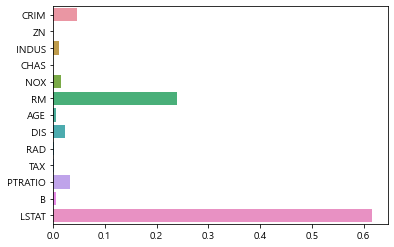

In [15]:
## feature importance를 추출하기
print("Feature importances:\n{0}".format(np.round(dtreg1.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X_train.columns , dtreg1.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dtreg1.feature_importances_ , y=X_train.columns)

아래 예시는 feature 2개, 결정 클래스 3개일 때 분류된 결과의 Scatter plot과 결정경계를 그리는 방법임  
시간없어서 코드 복붙 ㅠㅠ

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [16]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [ ]:
visualize_boundary(dtreg1, X_train, y_train)

In [47]:
## cross validation 이용해서 평가하기
from sklearn.model_selection import cross_val_score

cross_val_score(dtreg1, X_test, y_test, cv=10)

array([ 0.77480262,  0.8547675 ,  0.51323219,  0.96244332,  0.09723938,
        0.79318068,  0.39565389,  0.86525164,  0.79824361, -4.57711153])

## 랜덤포레스트 Regressor
- 주로 recommand, feature selection, image classification에 쓰임  
- 특정 특성을 선택하는 Decision Tree를 여러개 생성하여 이들을 기반으로 작업을 수행하는 것  
- 기존 앙상블의 bagging과 달리 하나의 변수의 상대적 중요도 측정 가능  
- 어떤 변수를 사용한 노드가 (전체 트리에 대해) 평균적으로 불순도를 얼마나 감소시키는지 확인하여 중요도 측정(=가중치 평균)  

- Single Decision Tree vs Random Forest
    - decision tree: 이미 학습된 데이터(과대적합 쉬움)에 대해 분류를 잘 하지만 새로운 데이터는 분류를 잘 하지 못함  새로운 데이터는 random forest가 잘 함  
    - Tree Correlation이라고 하는 특정 feature 하나가 정답에 많은 영향을 주게되면 대부분의 결과치가 유사하게 나타나는 문제점  

- 기존 rf에서 each tree가 자라는 과정  
    1) training set이 N개면 한 나무에도 N개의 sample case가 만들어짐 (복원 추출로 여러 나무를 만들 수 있음(bagging))  
    2) 입력변수가 M개가 있다면, 각 노드는 랜덤으로 M보다 작은 m개의 변수가 선택되어 나무가 자라는 동안 m은 변하지 않음
    - 여기서 문제점은 두 tree간에 correlation이 있을 수 있으므로, 확실한 분류를 하는 낮은 에러율을 가진 tree에 중요도를 높여서 rf에러율을 줄일 수 있음  
    
- 진행단계  
    1) training data set에서 무작위로 중복을 허용하여 N개 선택 (bootstrap)  
    2) N개의 data sample에서 data의 특성값(iris: petal width, height...) M개 중 중복 없이 m[^2]개 선택  (보통 $ m = \sqrt{전체 데이터 feature 개수 m} $)  
    3) decision tree training   
    4) 위 1)\~3) tree 생성 과정을 k번 반복(bagging)   
    5) 1)\~4)단계를 통해 생성된 k(n_estimators)개의 decision tree를 이용해서 가장 좋은 결과를 내는 tree 투표(voting)   
  
- importance = (현재 노드의 샘플 비율 x 불순도) - (왼쪽 자식 노드의 샘플 비율 x 불순도) - (오른쪽 자식 노드의 샘플 비율 x 불순도)  
    - 전체 중요도의 합으로 나누어 정규화  
    - 샘플 비율 = 해당 노드의 샘플수 / 전체 샘플수  
    - Random Forest의 변수 중요도 = 각 결정트리의 변수중요도의 함 / 트리 수  
      
- sklearn.ensemble.RandomForestClassifier() 하이퍼파라미터
    - BaggingClassifier의 매개변수를 모두 가지고 있음  
    - out-of-bag score: 예측이 얼마나 정확한가에 대한 추정을 수치로 나타낸 것
    - 변경 불가 옵션  
        - splitter : 항상 best  
        - presort : 항상 False  
        - max_samples : 항상 1  
        - base_estimator : 항상 지정된 매개변수를 사용한 결정트리 모델  

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

rfmodel1 = RandomForestRegressor(n_estimators=500, oob_score=True)
rfmodel1.fit(X_train, y_train)

predicted_train = rfmodel1.predict(X_train)
predicted_test = rfmodel1.predict(X_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)
print(f'Out-of-bag R-2 score estimate: {rfmodel1.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.886
Test data R-2 score: 0.762
Test data Spearman correlation: 0.846
Test data Pearson correlation: 0.876


<AxesSubplot:>

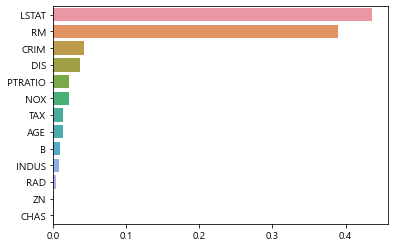

In [21]:
## feature importance 시각화
feature_series = pd.Series(data=rfmodel1.feature_importances_, index=X_train.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

## SVM Regression
자세한 설명은 분류파트의 SVM 참조

In [90]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [91]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

## GBM
  - **회귀분석 또는 분류분석을 수행**할 수 있는 예측모형이며, 예측모형의 앙상블 방법론 중 부스팅 계열에 속하는 알고리즘임
  - **경사 하강법(Gradient descent)을 결합**한 새로운 **부스팅(Boosting)** 알고리즘으로 **잔차(Residual, 정답과 예측값의 차이)**를 기준으로 함  
  - 반복하여 잔차를 줄여나가는(최소화하는) 과정에서 경사 하강법(Gradient descent)을 사용함<br><br>
  
  - 손실 함수(Loss function)<br>
    손실 함수의 기울기를 최소화하는 방향으로 추가적인 몯레이 순차적으로 생성되기 때문에 어떤 손실함수를 사용하는지에 따라 최종 생성되는 함수가 달라지며, 회귀냐 분류냐에 따라 사용하는 손실함수가 달라짐<br>
    Regression을 위한 손실 함수 : 제곱 오차(L2, 일반적으로 많이 사용함), 절대 오차(L1), Huber 오차, Quantile 오차 등<br>
    Classification을 위한 손실 함수 : 베르누이 오차, Adaboost 오차 등(이진 분류시에 y 의 레이블은 −1,1)<br><br>
    
  - 과적합(overfitting)<br>
    GBM은 과적합이 발생할 수 있음<br>
    y=F(x)+ϵ <- 정답 레이블을 y, 우리가 최종적으로 근사하고자 하는 함수를 F(x), 소음으로 인해 발생하는 오차를 ϵ<br>
    근사하는 목적은 F(x) 인데 반복수가 많아지다 보면 ϵ 까지 잔차로 인식해서 근사해버리는 과적합 문제가 발생함<br><br>
  
  - 정칙화(Regularization) 방법<br>
    GBM의 과적합을 방지하기 위해 적용하는 방법<br>
    서브샘플링(Subsampling), 수축법(Shrinkage), 조기 종료(Early stopping, 일반적으로 많이 사용됨)가 있음<br><br>
    
  - Variable importance<br>
    GBM에서 변수의 중요도 : 각 트리마다 변수 j의 중요도를 평균내어 구함<br>
    하나의 의사 결정 나무 T에서 변수 j의 중요도 : 해당 변수를 사용했을 때 얻어지는 정보 획득량(Information gain, IG)을 모두 더하여 측정<br><br>
    
  - GBM은 보다 좋은 성능을 보이지만 계속해서 근사 함수를 만들어 내야 하기 때문에 **실행 시간이 오래 걸리고 많은 컴퓨팅 자원이 필요**한 단점이 있음
  - 이를 **개선한 알고리즘으로 XGBoost, LightGBM, CatBoost** 등이 있음  
<br><br>

- sklearn.ensemble import GradientBoostingRegressor
- model = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)<br><br>
    - tree의 개수화 학습률이 성능에 많은 영향을 미치는 것으로 알려짐
    - loss : 최적화할 손실함수를 선택(default ls)<br>
        ls - 최소 제곱(Least Square) 회귀<br>
        lad - 최소 절대 편차로, 입력 변수의 순서 정보만을 기반으로하는 매우 강력한 손실 함수<br>
        huber - 위 둘의 조합<br>
        quantile - 분위수 회귀 허용<br>
    - **learning_rate** : 학습률. 각 트리의 기여도(default 0.1)<br>
        오차를 얼마나 강하게 보정할것인지를 제어함<br>
    - **n_estimators** : 트리의 수(default 100)<br>
        이 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고, 훈련세트에서의 실수를 바로잡을 기회가 많아지지만<br>
        너무 크면 모델이 복잡해지고 과적합될 수 있음<br>
    - max_depth(max_leaf_nodes) : 트리의 깊이. 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않도록 함<br>
    - subsample: 샘플 비율. 1보다 작으면 확률적 그래디언트 부스팅 발생(default 1.0)<br>
    - **criterion** : 분할 기준 선택<br>
        friedman_mse(일반적으로 기능이 좋음), mse, mae 등이 있음(defalut friedman_mse)<br>

In [31]:
## 예제코드로 보스턴집값 데이터 다시 불러오는 중..
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

X = df.drop(['PRICE'], axis = 1)

X_scaled = normalize(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, df['PRICE'], test_size=0.2, random_state=0)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gbmreg = GradientBoostingRegressor()
gbmreg.fit(X_train, y_train)

print(gbmreg.score(X_train, y_train))
print(gbmreg.score(X_test, y_test))

y_predict = gbmreg.predict(X_test)

0.9819844794245283
0.7928635995980091


## XGB Regression
Gradient Boosting
- 약한 학습기를 순차적으로 학습시켜 잘못된 예측값의 오류를 개선해 나가는 방법
- 일반적으로 약한학습기로 Tree 모델을 사용함

XGBoost 무엇이 다른가?
1. Regularized boosting  
일반적인 GBM은 과적합을 방지하는 기능이 없지만 XGBoost는 모델 자체에 과적합을 방지하는 기능이 존재
2. 결측값을 자동으로 처리  
XGBoost에 결측값이 있는 데이터를 넣으면 그 결측값을 하나의 값으로 인식하는 듯함. 결측값이 존재할 때의 최적 결과값도 파악
3. Tree Pruning  
GBM은 노드를 나눌 때 negative loss를 만나면 멈추도록 되어있는데, XGBoost는 하이퍼파라미터로 설정한 max_depth까지만 수행하고 Tree의 깊이를 완성시키면 다시 노드 가지치기를 수행한다. 이런 방법으로도 과적합 방지에 기여한다
4. 내장된 Cross Validation
5. Tree building 단계에서 병렬처리를 통해 더 빠른 결과처리 가능
Tree building 단계의 pseudo code가 아래와 같다면, XGBoost는 생성된 노드 아래에 each feature에 해당되는 부분에서 병렬처리를 해서 모델 생성 단계에 걸리는 시간이 단축된다.
```
For each leaf node:
    For each feature:
        Sort the instances in the node by the feature value
        Linear scan to decide the best split on the feature
    Take the best split and do it
```

참고) 파이썬 래퍼 기반의 XGB와 사이킷런 래퍼 기반의 XGB
xgboost 패키지를 불러와서 그 자체를 모델로 사용하는 경우 ( model = xgboost() ) 가 파이썬 래퍼에 해당하고, xgboost 안에서 XGBClassifier나 XGBRegressor를 꺼내 사용하는 게 사이킷런 래퍼에 해당. 솔직히 사용하는 입장에선 별 차이 없고 파라미터의 __default 값이나 메소드__가 달라진다. 

### 1) 사이킷런 래퍼 이용
하이퍼파라미터
- eta  
GBM의 학습률에 해당하는 파라미터로 0과 1 사이의 값을 지정. 파이썬 기반의 xgboost에서 default 값은 0.3이고, 사이킷런 래퍼에서는 디폴트가 0.1. 보통은 0.01과 0.2 사이의 값을 선호
- num_boost_rounds  
 GBM의 n_estimator와 동일, weak learner의 개수에 해당 (보통 최소 100)
- min_child_weight  
 트리에서 추가로 가지를 나눌지 결정하기 위해 필요한 데이터 weight의 총합(default=1) weight가 클수록 분할을 자제함 0~무한대 값
- gamma   
트리 리프노드를 추가로 나눌지 결정하는 최소 손실 감소 값. 값이 클수록 과적합 감소 0~무한대까지 값 설정 (default = 0)
- max_depth  
 트리 깊이 (defulat = 6) 0을 지정하면 깊이에 제한이 없음
- sub_sample  
 전체 데이터에서 어느정도의 비율을 트리를 생성하는 데이터로 사용할 것인지 결정. (default = 1)
- colsample_bytree  
Tree 생성에 필요한 피처를 임의로 샘플링. n개에서 어느정도 비율만 사용할지 결정함 0~1 사이의 값으로 설정 (default = 1)
- lambda  
L2 Regularization 적용 값으로 피처 개수가 많을 때 과적합을 감소시키기 위해 사용 (default =1)
- alpha  
 L1 Regularization 적용값. 설명은 위와 동일 (default = 0)
- scale_pos_weight  
 특정 값으로 치우친 클래스로 구성된 데이터의 균형을 유지하기 위한 파라미터, 1 클래스에 대응하는 0 클래스의 개수를 의미. number of negative class to positive class (default = 1)  
ex. target = 1인 데이터가 90개이고, target = 0인 데이터가 10개이면 scale_pos_weight는 9로 설정

In [48]:
from xgboost import XGBRegressor
from xgboost import plot_importance 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

xgbreg = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgbreg, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)  ##mae에 음수 씌워서 다시 양수로 만드는 방법
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.099 (0.294)


<BarContainer object of 13 artists>

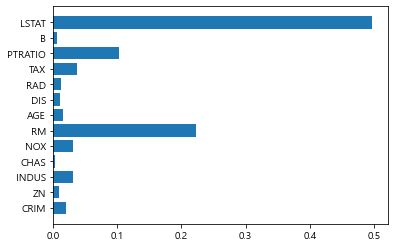

In [50]:
xgbreg.fit(X_train, y_train)   ##위에서 xgbreg 인스턴스 자체에 학습값을 넣진 않았으므로 다시 학습시켜줌
plt.barh(X_train.columns, xgbreg.feature_importances_)

### 2) DMatrix로 변환 후 이용 (CV를 할 때 더쉽나..?)

In [62]:
import xgboost as xgb
import time

start = time.time() # 시작 시간 지정
xgb_dtrain = xgb.DMatrix(data = X_train, label = y_train) # 학습 데이터를 lightgbm 모델에 맞게 변환
xgb_dtest = xgb.DMatrix(data = X_test) # 평가 데이터를 lightgbm 모델에 맞게 변환

xgb_param = {'max_depth': 10, # 트리 깊이
         'learning_rate': 0.01, # Step Size
         'n_estimators': 100, # Number of trees, 트리 생성 개수
         'objective': 'multi:softmax', # 목적 함수 결과변수가 여러개라서 .. 2진분리는 logistic
        'num_class': len(set(y_train)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

xgb_model = xgb.train(params = xgb_param, dtrain = xgb_dtrain) # 학습 진행
xgb_model_predict = xgb_model.predict(xgb_dtest) # 평가 데이터 예측

#print("Accuracy: %.2f" % (accuracy_score(y_test, xgb_model_predict) * 100), "%") # 정확도 % 계산
#print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

[13:32:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




## LightGBM
- XGBoost보다 더 빠른 학습과 예측수행시간
- 메모리 사용량이 더 적음
- 리프 중심 트리 분할 방식을 사용하여 트리의 균형을 맞추지 않으며, 트리의 깊이가 깊고 비대칭적인 규칙 트리를 생성한다 -> 균형 트리 분할 방식보다 예측 오류 손실을 최소화 함
- 카테고리형 피처를 자동 변환하고 최적으로 분할함

In [ ]:
from lightgbm import LGBMRegressor

lgbm_wrapper = LGBMRegressor(n_estimators = 400)

# 조기 중단 수행
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "rmse", eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

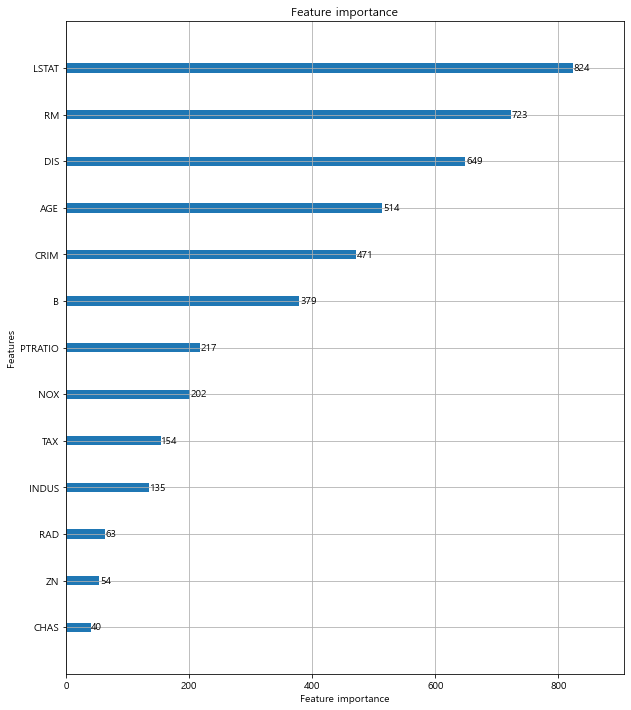

In [58]:
## 변수 중요도를 측정하기
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper, ax = ax)

## CatBoost
- 범주형 변수를 One-hot Encoding 또는 Label Encoding 등의 작업을 하지 않고도 그대로 모델의 input으로 사용할 수 있게 함  (알아서 target encoding을 해줌)

In [68]:
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

train_dataset = cb.Pool(X_train, y_train)   ##catboost에 넣을 때 X와 y가 합쳐진 모양으로 넣음
test_dataset = cb.Pool(X_test, y_test)    

cbreg = cb.CatBoostRegressor(loss_function = 'RMSE')
cbreg.fit(X_train, y_train)


pred = cbreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Learning rate set to 0.03548
0:	learn: 9.0122486	total: 144ms	remaining: 2m 23s
1:	learn: 8.8120691	total: 145ms	remaining: 1m 12s
2:	learn: 8.6104403	total: 146ms	remaining: 48.6s
3:	learn: 8.4308792	total: 147ms	remaining: 36.7s
4:	learn: 8.2705769	total: 148ms	remaining: 29.5s
5:	learn: 8.0954061	total: 150ms	remaining: 24.8s
6:	learn: 7.9260949	total: 151ms	remaining: 21.4s
7:	learn: 7.7672095	total: 152ms	remaining: 18.8s
8:	learn: 7.6085937	total: 153ms	remaining: 16.8s
9:	learn: 7.4516165	total: 154ms	remaining: 15.3s
10:	learn: 7.3015457	total: 155ms	remaining: 14s
11:	learn: 7.1450679	total: 156ms	remaining: 12.9s
12:	learn: 6.9947503	total: 157ms	remaining: 12s
13:	learn: 6.8480578	total: 159ms	remaining: 11.2s
14:	learn: 6.7261107	total: 160ms	remaining: 10.5s
15:	learn: 6.5764639	total: 161ms	remaining: 9.88s
16:	learn: 6.4490181	total: 162ms	remaining: 9.35s
17:	learn: 6.3295673	total: 163ms	remaining: 8.88s
18:	learn: 6.2091931	total: 164ms	remaining: 8.46s
19:	learn: 6.0

Text(0.5, 0, 'CatBoost Feature Importance')

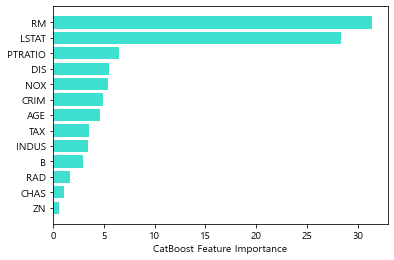

In [71]:
## 변수중요도 산출
sorted_feature_importance = cbreg.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_feature_importance], 
        cbreg.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [ ]:
##GridSearch를 사용하고 싶을 때
grid = {'iterations':[100.150,200],
       'learning_rate':[0.03, 0.1],
       'depth': [2,4,6,8],
       '12_leaf_reg':[0.2,0.5,1,3]}
cbreg.grid_search(grid, train_dataset)

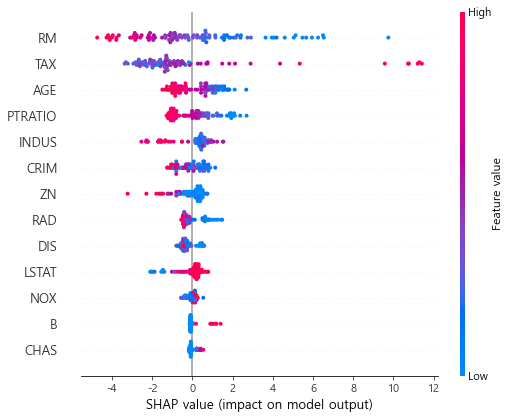

In [74]:
## 변수가 어떻게 영향을 주었는지 해석
import shap
explainer = shap.TreeExplainer(cbreg)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = X_train.columns[sorted_feature_importance])

색깔로 feature value 확인하고 model output에 어떤 영향을 미치고 있는지 체크가능
RM의 경우 feature value가 적으면 model의 결과값도 올리는 것을 확인할 수 있음
LSTAT은 값이 낮으면 model의 결과값도 낮춤

## 앙상블 여러 알고리즘 한번에 성능비교

In [40]:
# 모델, X, y를 넣고 5 CV 평균 RMSE 계산하는 함수
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))
    
    
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_train, y_train)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 4.254 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 3.373 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 3.073 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 2.965 
#####  LGBMRegressor  #####
 5 교차 검증의 평균 RMSE : 3.079 


## 혼합모델 (각 모델의 결과를 더하기)
- 모델별로 가중치의 기준이 있지는 않음
- 개별 모델 중 성능이 더 좋은 쪽에 약간의 가중치를 주는 정도

In [43]:
# XGB와 LGB를 섞어보기

xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
lgb_pred = lgb_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgb_pred

# 분류

## SVM(Support Vector Machine)
- 분류(SVC 사용), 회귀(SVR 사용)<br>
※ 아래 내용 정리는 SVC 기준  
- 하이퍼파라미터 : 매개변수 C와 gamma. grid search
- **SVM의 장점**<br>
    - 커널 서포트 벡터 머신은 강력한 모델이며 다양한 데이터셋에서 잘 작동
    - SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음
    - 저차원과 고차원의 데이터에 모두 잘 작동하지만 **샘플이 많을 때는 잘 맞지 않음**
    - 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 좋지 않을수도
- **SVM의 단점**
    - 데이터 전처리와 매개변수 설정에 신경을 많이 써야 함
    - 그래서 전처리가 거의 필요 없는 트리 기반 모델(랜덤포레스트,그래디언트부스팅)에 많이 사용함
    - 분석하기 어려움 (예측이 어떻게 결정되었는지 알 수 없음)
    - but! 모든 특성이 비슷한 단위이고, 스케일이 비슷하다면 SVM을 시도할만 함  
  
__sklearn의 svm class- SVC__
- sklearn.svm.LinearSVC
- sklearn.svm.SVC
    - gamma 매개변수의 기본값은 'auto'이며, 이 값의 의미는 특성 개수의 역수 1/X_train.shape[1]
    - 분류 확률을 구하려면 모델 생성 시 probability = True로 설정해 model.predict_proba로 조회가능
- LinearSVC
    - SVC에서 kernel = 'linear'인 분류모델
    - 손실함수 default는 제곱힌지(squared hinge), C의 default는 1.0
    - 선형 계산에 특화되어 있어 SVC를 이용하는 것보다 더 효율적인 성능을 보여줌
    - predict_proba 제공하지 않음 (각 클래스에 대한 확률값을 얻으려면 사용자가 소스코드를 구현해야 함)
    - 레이블이 3개 이상인 경우 Linear SVC보다는 SVC를 사용하고 probability=True로 설정
- SVC vs LinearSVC
    - LinearSVC는 SVC보다 많은 샘플 데이터에서 선호된다고 알려짐
    - 실제로 샘플의 수가 충분히 크지 않으면, 특징이 아무리 많더라도 SVC를 사용하는 것이 좋은 것으로 확인됨
        (출처 : https://m.blog.naver.com/cjh226/221359032956)  

- SVC(support vector classifier) class의 파라미터 : kernel(kernel 지정), C(슬랙변수 가중치(slack variable weight)를 선택)<br>
    - Kernel 파라미터<br>
        - kernel = "linear" : 선형 SVM. k(x1,x2)=xT1x2
        - kernel = "poly" : 다항 커널(Polynomial Kernel). k(x1,x2)=(γ(xT1x2)+θ)d
        - kernel = "rbf" 또는 kernel = None : RBF(Radial Basis Function) 또는 가우시안 커널(Gaussian Kernel). k(x1,x2)=exp(−γ||x1−x2||2)
        - kernel = "sigmoid" : 시그모이드 커널(Sigmoid Kernel). k(x1,x2)=tanh(γ(xT1x2)+θ)<br>
            - ※ γ(gamma), θ(coef0), d(degree)<br>
            - ※ RBF커널이 가장 많이 사용됨<br><br>

- 모델 return attribute  
    - n_support_: 각 클래스의 서포트의 개수
    - support_: 각 클래스의 서포트의 인덱스
    - support_vectors_: 각 클래스의 서포트의 x 값. x+와 x−
    - coef_: w 벡터
    - intercept_: −w0
    - dual_coef_: 각 원소가 ai⋅yi로 이루어진 벡터, 서포트 벡터
    

### 선형 서포트 벡터 머신(LinearSVM)
- 데이터를 선형으로 분리하는 최적의 선형 결정 경계를 찾는 알고리즘
- 클래스가 다른 데이터들을 **가장 큰 마진(margin)으로 분리**해내는 **선 또는 면(결정 경계)을 찾아내**는 것
- **매개변수 : C(Cost)**
    - 이상치(outlier)들이 있을 경우 데이터들을 선형적으로 완벽하게 분리하는 것은 불가능하기 때문에, 약간의 오류를 허용하는 전략이 만들어졌고, 이와 관련된 파라미터가 C임  
    - C는 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정함(L2 규제의 강도를 결정)
    - C가 작을수록 많이 허용하고, 클수록 규제가 감소하여 적게 허용함
    - C가 너무 낮으면 과소적합될 가능성이 커지고, C가 너무 높으면 과대적합될 가능성이 커짐
    - C의 유무에 따라 **없으면 hard-margin SVM, 있으면 soft-margin SVM**으로 나뉨  
   
__SVM은 매개변수 설정과 데이터 스케일에 매우 민감함. 따라서 boxplot등을 그려 특성 간의 크기가 매우 다르다면 MinMaxScaler등을 이용해 Normalization을 해주어야 함__

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Xc, yc, stratify=yc, random_state=0, test_size=0.2)

#default : C=1, kernel='rbf', gamme='auto'(1/n_features)
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.92
테스트 세트 정확도: 0.91


In [85]:
svc = SVC(C=1000)
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.954
테스트 세트 정확도: 0.956


### 비선형 SVM 분류

In [89]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

## 데이터생성
X, y = make_moons(n_samples = 100, noise = 0.15)

## 비선형 SVM 모델 만들기  (PolyFeatures를 이용해서 feature의 1승, 2승, 3승 데이터를 추가해줌)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss = 'hinge'))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

## 스태킹앙상블
- 기본 데이터를 여러모델에 학습시켜 결과값을 얻는다 (기반모델)
- 기반모델에서 예측된 결과값을 학습데이터로 활용하여 최종 예측결과를 만든다 (최종 메타모델)
- 스태킹 앙상블은 반드시 개별 모델보다 예측이 향상되지는 않음
- 스태킹 앙상블 내에서 예측력을 올리기 위해서는 2~3개 모델이 아니라 많은 개별모델이 필요함

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size = 0.2)

In [94]:
## 개별 모델 생성하기(모델은 굳이 이래야 할 필요 없고.. 기반모델/최종모델 모두 마음대로 설정가능)
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

## 개별 모델의 예측 결과를 합한 데이터셋으로 학습하는 최종모델
lr_final = LogisticRegression()

In [95]:
## 개별 모델 학습시키기 (train 데이터 사용)
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [96]:
## 학습된 개별 모델이 각자 반환하는 예측 데이터 저장(test 데이터를 사용함)
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

In [101]:
## 개별 알고리즘의 예측값을 feature로 하는 최종 예측모델 생성
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

(4, 114)


In [102]:
## 각 obs의 예측 결과가 한 개의 row가 될 수 있게 np array를 변경
pred = np.transpose(pred)
print(pred.shape)

(114, 4)


In [103]:
## 각 분류기의 예측데이터를 최종모델에 학습시킴
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

In [105]:
## 모델 간의 정확도 비교
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
print('최종 메타 모델 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

KNN 정확도: 0.9474
랜덤 포레스트 정확도: 0.9561
결정트리 정확도: 0.9211
에이다부스트 정확도: 0.9912
최종 메타 모델 예측 정확도: 0.9737


### 참고) CV 기반의 스태킹 앙상블
- 앞선 스태킹 앙상블은 기반 모델에서 train set를 쓰고, 최종 메타모델에 들어가는 데이터는 test set을 사용하였음.
- 이런 경우 전체 데이터의 일부만을 최종 모델에서 학습하기 때문에 학습 데이터에 손해를 볼 수 밖에 없고, 과적합 이슈가 생길 수 있음
- 과적합 이슈를 해결하기 위해 기반 모델에서 Cross validation을 사용해서 결과값을 만든 것을 최종모델에 활용
- ex) 개별 모델마다 CV를 이용한 학습모델을 만들고, CV중 한 개 폴드씩 모아서 최종모델의 테스트셋으로 활용함

In [107]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):  ## 순서대로 model, train X, train Y, test X, fold 개수 K
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False) ##주의: random_state 지정하면 오류 나옴

    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

In [ ]:
## 학습데이터 CV set 합치기
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)

print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

In [ ]:
lr_final.fit(Stack_final_X_train, y_train)  
stack_final = lr_final.predict(Stack_final_X_test)  ## 정확도 확인을 위한 test set

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

## GBM Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbmclf = GradientBoostingClassifier(n_estimators=10, # 기본값은 100
                                    validation_fraction=0.2,
                                    n_iter_no_change=5, tol=0.01, verbose = 1,
                                    random_state=0)
    
gbmclf.fit(X_train , y_train)
gbmpred = gbmclf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gbm_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

ValueError: Unknown label type: 'continuous'

## LGBM Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size = 0.2, random_state = 156)

lgbm_wrapper = LGBMClassifier(n_estimators = 400)

# 조기 중단 수행
evals = [(X_test, y_test)]
# eval_metric : 검증에 사용되는 함수 정의, 기본값은 회귀 -> rmse, 분류 -> error, logloss -> Negative log-likelihood
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss", eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)

In [ ]:
## 평가함수를 만들어 평가하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

get_clf_eval(y_test, preds)

## CatBoost

In [ ]:
import catboost as cb
import time

start = time.time() # 시작 시간 지정
cb_dtrain = cb.Pool(data = X_train, label = y_train) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 100, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(X_test), axis = 1) + 1 # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
print("Accuracy: %.2f" % (accuracy_score(y_test, cb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산

# 군집분석

## 1. Hierarchical Clustering (계층적 군집분석)
- 유클리드 거리를 이용한 군집분석 방법
- 덴드로그램
    - 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림
    - 3차원 이상의 군집에서도 dendogram을 통해 직관적인 cluster 형성이 가능하다는 장점이 있다.
- 군집화 방식(하이퍼파라미터 method)
    - Single : 최단 연결법, 두 군집에 있는 모든 데이터 조합에서 데이터 사이 거리를 측정해서 가장 최소 거리(작은 값)를 기준으로 군집 거리를 측정
    - Complete : 최장 연결법으로 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식
    - Average : 평균 연결법, 두 군집의 데이터들 간 모든 거리들의 평균을 군집간 거리로 정의 
    - Centroid : 두 군집의 중심점(centroid)를 정의한 다음 두 중심점의 거리를 군집간의 거리로 측정
    - Ward : 연결될 수 있는 군집 조합을 만들고, 군집 내 편차들의 제곱합을 기준으로 (군집의 평균과 데이터들 사이의 오차 제곱합(SSE)을 측정해) 최소 제곱합을 가지게 되는 군집끼리 연결
- 거리계산방법(하이퍼파라미터 metric)
    - scipy.spatial.distance.pdist에서 사용가능한 거리계산방법 확인가능
    - 'minkowski': $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p} $, p=1일때 맨하탄거리, p=2일때 유클리드거리와 동일함
    - 'cityblock': 맨하탄거리
    - 'cosine': 코사인거리
    - 'correlation': 상관계수
    - 'jaccard': 두 벡터의 값들이 얼마나 불일치하는지 계산한 값

Step1. 군집간 거리를 계산할 method를 선택한 후 거리를 계산하기 & 덴드로그램 그리기
- scipy.cluster.hierarchy에서 linkage(y, mehod = 'single', metric = 'euclidean', optimal_ordering = False)
    - y값: 1-d condensed distance metrix (거리 데이터에서 대각선 상방 값만 존재하는 매트릭스) 또는 관측치의 2d array
    - return값: linkage matrix로 인코딩된 클러스터 결과

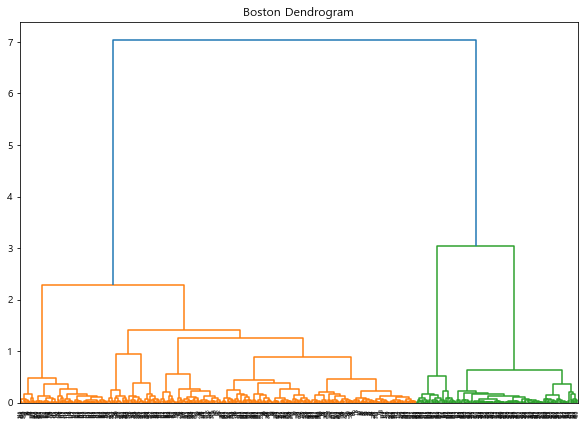

In [11]:
X = df.drop(['PRICE'], axis = 1)

##데이터 스케일에 차이가 많이 나기 때문에 Normalize를 해준다 (흠 )
from sklearn.preprocessing import normalize
X_scaled = normalize(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,7))
plt.title('Boston Dendrogram')
dend = shc.dendrogram(shc.linkage(X_scaled, method = 'ward'))

Step2. 덴드로그램 기준으로 군집을 나눌 개수를 선택하고 각 관측값에 군집번호 부여
- scipy.custer.hierarchy에서 cut_tree(Z, [n_clusters, height])  
    : 주어진 링키지 매트릭스 Z에서 n_cluster 개수만큼의 군집으로 나누거나, 주어진 height 기준으로 군집을 나눈다 (height로 자르는 것은 ultrametric tree에서만 가능하다)

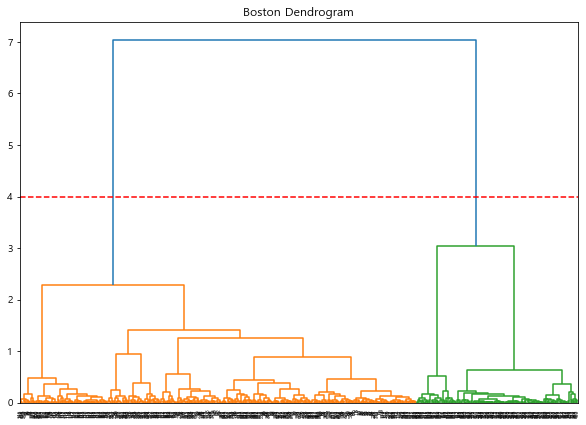

In [12]:
## 2개로 나누는 덴드로그램 시각화
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,7))
plt.title('Boston Dendrogram')
dend = shc.dendrogram(shc.linkage(X_scaled, method = 'ward'))
plt.axhline(y=4, color='r', linestyle='--')

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

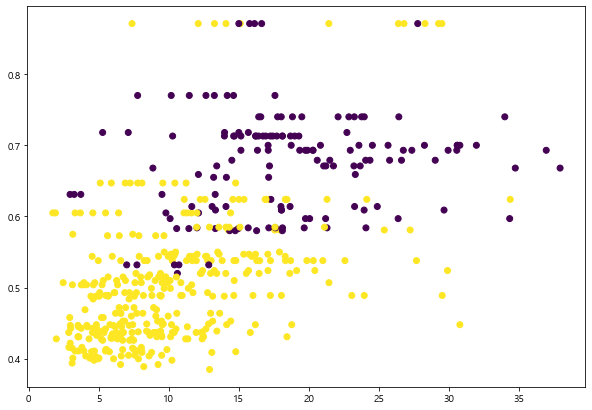

In [16]:
## cluster에 미친 두 개 변수의 영향을 알아보기 
plt.figure(figsize = (10,7))
plt.scatter(X['LSTAT'], X['NOX'], c = cluster.labels_)

Step3. 군집개수에 따른 성능 평가 (실루엣계수)
- $s(i)\; = \; {b(i) - a(i) \over max{a(i), b(i)}}$ &nbsp; where a(i) = "데이터포인트 i가 속하지 않은 클러스터C의 데이터 포인트와의 거리평균"의 최소값
- 각 데이터포인트들의 계수 평균이 1에 가까운수록 군집화가 잘 되었다고 본다
- 개별 클러스터의 실루엣계수를 구할 수도 있는데, 1에 가까운 실루엣계수 평균을 가지는 클러스터는 'clear-cut', 0에 가까운 클러스터는 'weak' 클러스터로 표현한다

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
print(silhouette_score(X, cluster.labels_))   ## Agrommerative Clustering으로 얻은 clustering label값

0.6776072306645798


In [19]:
## 포인트별 실루엣계수 구하기 (이것을 이용해 클러스터별 실루엣 계수도 계산 가능)
X['cluster'] = cluster.labels_

df['silhouette'] = silhouette_samples(X, cluster.labels_) ## 각 포인트에서의 실루엣계수를 계산한 뒤 array로 반환
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,silhouette
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,24.00000,0.81807
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,21.60000,0.78903
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,34.70000,0.79509
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,33.40000,0.77352
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,36.20000,0.77499


## K-Means Clustering (K-평균군집화)
- 데이터셋을 k의 군집으로 나눈다. k는 하이퍼파라미터로 사용자가 지정
- 군집의 중심이 될 것 같은 임의의 지점(centroid)을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 기법

- 장점
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
- 단점
    - 거리기반이기 때문에 속성 많을 수록 군집화 정확도 떨어진다 (이를 위해 PCA 해야할 수도 있음)
    - 반복횟수가 많을경우 수행 시간 느려짐
    - 몇개의 군집(cluster)를 선택해야 할지 사용자가 직접 정해주어야 함
      
- sklearn.cluster.KMeans(n_cluster = 8, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, verbose = 0, random_state = None, copy_x = True, algorithm = 'auto')
    - n_cluster 군집 중심점의 개수(최종 군집 개수)
    - init: 초기에 군집 중심점의 좌표를 설정할 방식, 보통은 k-means++ 방식으로 최초 설정
    - n_init: n_init으로 지정된 횟수만큼 초기중심값을 다르게하면서 k-means를 돌리고, 최종적으로는 가장 좋은 결과가 출력됨
    - max_iter: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
    
- return값
    - labels_
    - cluster_centers_
        - 각 군집 중심점 좌표(변수개수 n차원, 군집개수k개 만큼 출력됨)
        - 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음
    - feature_names_in: ndarray 형태의 X feature name

Step1. Inertia Value를 이용한 적정 군집수 판단
- 군집 내 데이터들과 중심간의 거리 합으로 군집 응집도를 나타냄
- sklearn KMeans의 return값에서 inertia_ 속성으로 조회 가능
- inertia 값이 급격히 떨어지는 지점이 최적 군집수로 판단 가능  
    아래 예시에서는 군집 4개 이후로 inertia 값에 거의 변동이 없으므로 군집을 4개로 나눈다

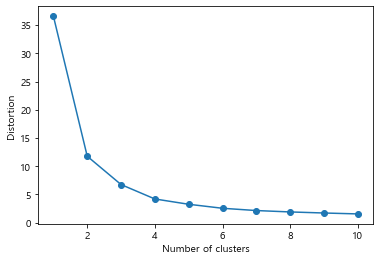

In [26]:
from sklearn.cluster import KMeans

distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Step2. 선택한 군집 개수만큼 클러스터링을 수행하기

In [33]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters=4, init='k-means++', max_iter=300)
kmeans1.fit(X_scaled)
kemans_labels = kmeans1.fit_predict(X_scaled)

plt.scatter

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

Step3. Scatter plot으로 군집이 잘 나누어졌는지 확인한다 (Silhouette는 생략)
- 변수의 개수가 많아 Scatter plot을 그리기 어려울 때는 2개 주성분의 Scatter plot을 그려본다

In [31]:
## 2개 주성분으로 만들고 원데이터에 pca값을 붙이기
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_scaled)
boston_pca = pca.transform(X_scaled)

boston_pca = pd.DataFrame(boston_pca, columns = ['주성분1', '주성분2'])

X = df.drop(columns = ['PRICE', 'silhouette'])
X_pca = pd.concat([X, boston_pca], axis = 1)
X_pca.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,주성분1,주성분2
0,0.00632,18.00000,2.31000,0.00000,0.53800,6.57500,65.20000,4.09000,1.00000,296.00000,15.30000,396.90000,4.98000,-0.16926,-0.00670
1,0.02731,0.00000,7.07000,0.00000,0.46900,6.42100,78.90000,4.96710,2.00000,242.00000,17.80000,396.90000,9.14000,-0.24990,-0.06637
2,0.02729,0.00000,7.07000,0.00000,0.46900,7.18500,61.10000,4.96710,2.00000,242.00000,17.80000,392.83000,4.03000,-0.24892,-0.03739
3,0.03237,0.00000,2.18000,0.00000,0.45800,6.99800,45.80000,6.06220,3.00000,222.00000,18.70000,394.63000,2.94000,-0.28708,-0.01588
4,0.06905,0.00000,2.18000,0.00000,0.45800,7.14700,54.20000,6.06220,3.00000,222.00000,18.70000,396.90000,5.33000,-0.28794,-0.03009


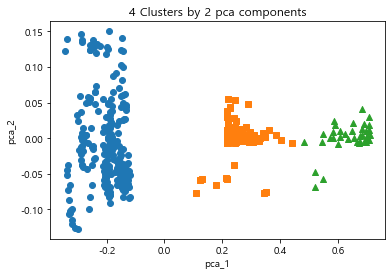

In [38]:
X_pca['cluster'] = kmeans1.labels_

marker0_ind = X_pca[X_pca['cluster']==0].index
marker1_ind = X_pca[X_pca['cluster']==1].index
marker2_ind = X_pca[X_pca['cluster']==2].index
marker2_ind = X_pca[X_pca['cluster']==3].index

plt.scatter(x=X_pca.loc[marker0_ind,'주성분1'], y=X_pca.loc[marker0_ind,'주성분2'],marker='o')
plt.scatter(x=X_pca.loc[marker1_ind,'주성분1'], y=X_pca.loc[marker1_ind,'주성분2'],marker='s')
plt.scatter(x=X_pca.loc[marker2_ind,'주성분1'], y=X_pca.loc[marker2_ind,'주성분2'],marker='^')

plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.title('4 Clusters by 2 pca components')
plt.show()

In [ ]:
### 분류를 위한 군집인 경우 예측군집 vs 실제y 로 비교 그래프를 그릴 수도 있다
f, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].scatter(X_pca['주성분1'], X_pca['주성분2'], c=X_pca.실제y값, cmap='gist_rainbow',edgecolor='k', s=150)
ax[1].scatter(X_pca['주성분1'], X_pca['주성분2'], c=kmeans1.labels_, cmap='jet',edgecolor='k', s=150)
ax[0].set_xlabel('주성분1', fontsize=18)
ax[0].set_ylabel('주성분2', fontsize=18)
ax[1].set_xlabel('주성분1', fontsize=18)
ax[1].set_ylabel('주성분2', fontsize=18)
ax[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
ax[0].set_title('Actual', fontsize=18)
ax[1].set_title('Predicted', fontsize=18)